___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [1]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
tf.test.is_gpu_available()


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12264406694663009984
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14417788928
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17018394365528024854
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train[7]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  

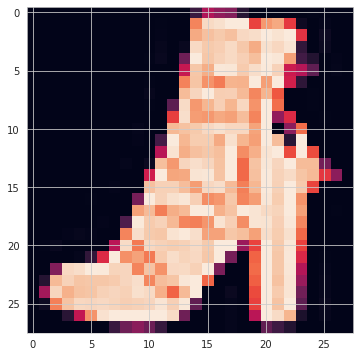

In [10]:
plt.imshow(x_train[11]);

In [11]:
y_train.shape

(60000,)

In [12]:
y_train[11]

9

In [13]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [14]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [16]:
classes[y_train[11]]

'Ankle boot'

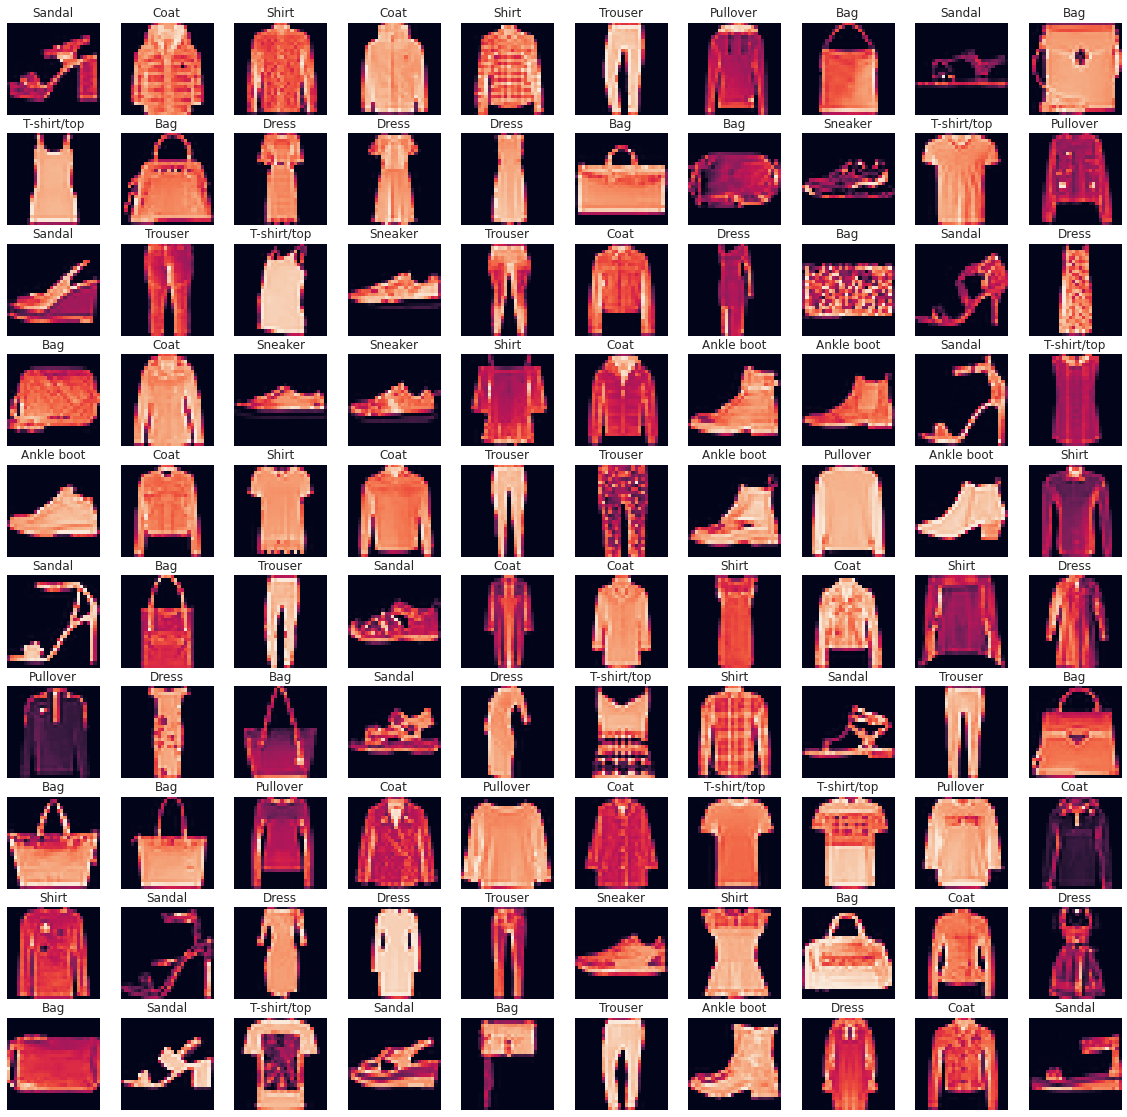

In [17]:
plt.figure(figsize=(20, 20))
for i in range(100):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(10, 10, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(x_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [18]:
x_train[11].min()

0

In [19]:
x_train[11].max()

255

In [20]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
x_train[11].min()

0.0

In [21]:
x_train[11].max()

1.0

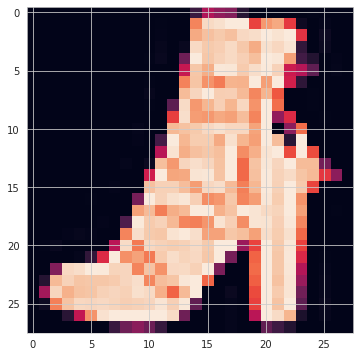

In [22]:
plt.imshow(x_train[11]);

In [23]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [24]:
x_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [25]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [28]:
Y_train[11]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [29]:
X_train = x_train
X_test = x_test

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']**

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [31]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=42, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 42)        10626     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 42)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2058)              0         
                                                                 
 dense (Dense)               (None, 128)               2

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights = True)

In [35]:
model.fit(X_train, Y_train, batch_size=128, epochs=100, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/100
469/469 [==============================] - 12s 6ms/step - loss: 0.5160 - accuracy: 0.8145 - val_loss: 0.3683 - val_accuracy: 0.8683
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3211 - accuracy: 0.8862 - val_loss: 0.3323 - val_accuracy: 0.8806
Epoch 3/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2739 - accuracy: 0.9002 - val_loss: 0.2867 - val_accuracy: 0.8957
Epoch 4/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2444 - accuracy: 0.9119 - val_loss: 0.2632 - val_accuracy: 0.9062
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2220 - accuracy: 0.9186 - val_loss: 0.2667 - val_accuracy: 0.9067
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2052 - accuracy: 0.9249 - val_loss: 0.2520 - val_accuracy: 0.9083
Epoch 7/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1845 - accuracy: 0.9325 - val_loss: 0.2552 - val_accuracy: 0.907

**TASK 7: Plot values of metrics you used in your model.**

In [36]:
summary = pd.DataFrame(model.history.history)
summary.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.076,0.972,0.273,0.920
16,0.064,0.977,0.319,0.920
17,0.058,0.979,0.339,0.914
18,0.050,0.982,0.350,0.915
19,0.047,0.983,0.360,0.920


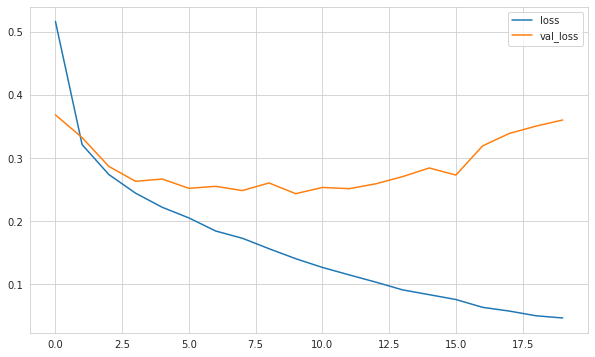

In [37]:
summary[["loss", "val_loss"]].plot();

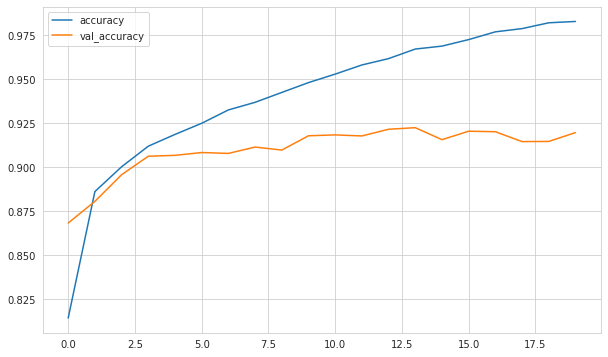

In [38]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2436 - accuracy: 0.9178


[0.24355512857437134, 0.9178000092506409]

In [41]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24355512857437134
Test accuracy: 0.9178000092506409


## Prediction

In [42]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[3.6738459e-06, 4.7531486e-08, 6.7022079e-08, ..., 4.4313417e-04,
        1.3449471e-07, 9.9947768e-01],
       [1.3040965e-06, 8.5158302e-13, 9.9999046e-01, ..., 4.2708719e-12,
        6.5510639e-11, 1.8241756e-14],
       [1.5008911e-08, 1.0000000e+00, 4.4594429e-11, ..., 9.4685324e-16,
        1.4928775e-11, 8.2618543e-14],
       ...,
       [1.3357590e-07, 3.8347475e-10, 8.1524962e-07, ..., 4.3415319e-08,
        9.9999249e-01, 6.2574337e-09],
       [3.5856922e-07, 9.9999857e-01, 3.7498957e-08, ..., 4.4527514e-13,
        5.0828436e-10, 3.8210884e-10],
       [5.4570794e-04, 5.6907579e-06, 3.9610127e-03, ..., 6.7275691e-01,
        1.0268555e-02, 1.5608360e-03]], dtype=float32)

In [43]:
y_pred = np.argmax(pred_prob, axis=1)

In [44]:
y_pred

array([9, 2, 1, ..., 8, 1, 7])

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.88      0.89      0.88      1000
           3       0.91      0.92      0.92      1000
           4       0.84      0.92      0.88      1000
           5       0.99      0.98      0.98      1000
           6       0.77      0.77      0.77      1000
           7       0.93      0.99      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [45]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [46]:
print(confusion_matrix(y_test, y_pred))

[[815   0  16  22   7   2 135   0   3   0]
 [  1 984   0  10   3   0   1   0   1   0]
 [ 15   0 885   7  55   0  38   0   0   0]
 [  9   3   5 922  32   0  27   0   2   0]
 [  0   0  37  19 919   0  24   0   1   0]
 [  0   0   0   0   0 976   0  17   0   7]
 [ 59   0  65  24  79   0 768   0   5   0]
 [  0   0   0   0   0   3   0 987   0  10]
 [  3   0   2   5   2   3   5   5 975   0]
 [  0   0   0   0   0   4   1  48   0 947]]


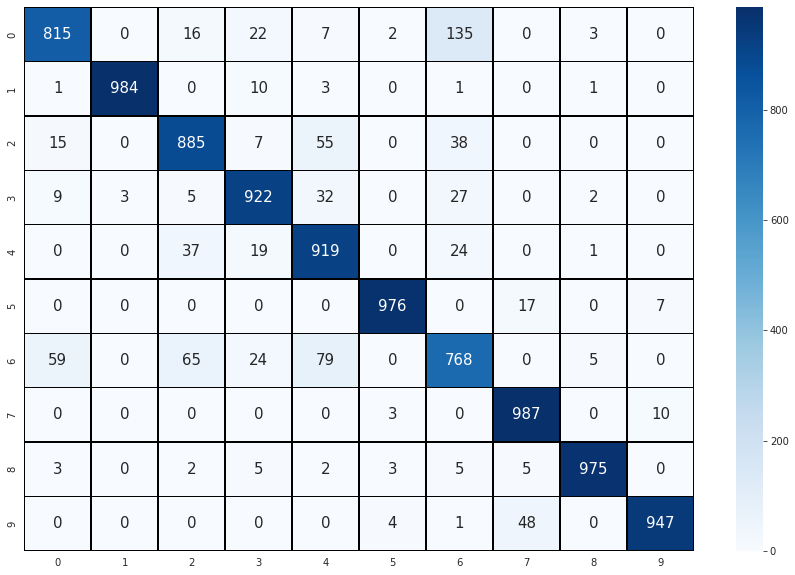

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

## Model 2

In [116]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=42, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [117]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 28)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 28)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 42)        10626     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 42)         0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 42)         

In [118]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)

In [119]:
model.fit(X_train, Y_train, batch_size=128, epochs=100, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6018 - accuracy: 0.7778 - val_loss: 0.4047 - val_accuracy: 0.8553
Epoch 2/100
469/469 [==============================] - 3s 5ms/step - loss: 0.3920 - accuracy: 0.8575 - val_loss: 0.3383 - val_accuracy: 0.8776
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.3454 - accuracy: 0.8740 - val_loss: 0.3229 - val_accuracy: 0.8813
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.3157 - accuracy: 0.8840 - val_loss: 0.2928 - val_accuracy: 0.8926
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2951 - accuracy: 0.8914 - val_loss: 0.2713 - val_accuracy: 0.8988
Epoch 6/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2785 - accuracy: 0.8981 - val_loss: 0.2689 - val_accuracy: 0.9036
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.2678 - accuracy: 0.8997 - val_loss: 0.2568 - val_accuracy: 0.9073

In [120]:
summary = pd.DataFrame(model.history.history)
summary.tail(5)

,loss,accuracy,val_loss,val_accuracy
29,0.161,0.938,0.226,0.917
30,0.159,0.940,0.213,0.926
31,0.157,0.940,0.221,0.925
32,0.151,0.942,0.209,0.926
33,0.153,0.942,0.209,0.928


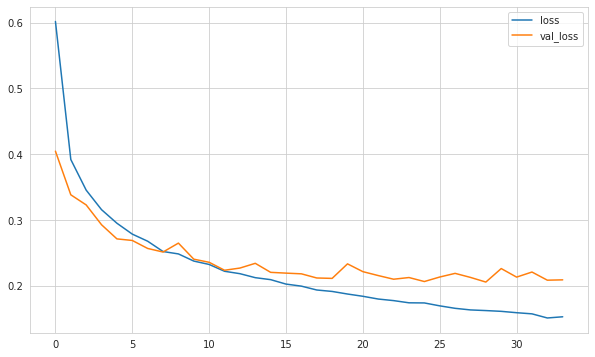

In [121]:
summary[["loss", "val_loss"]].plot();

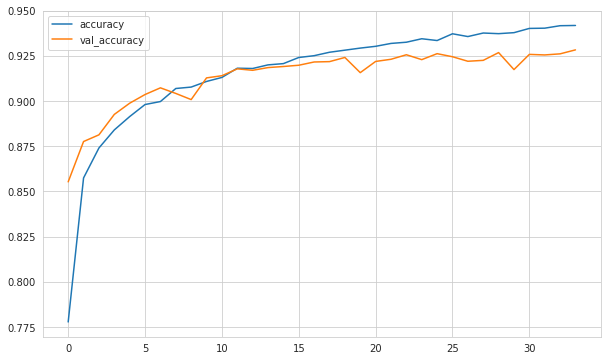

In [122]:
summary[["accuracy", "val_accuracy"]].plot();

In [123]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2057 - accuracy: 0.9268


[0.2056654840707779, 0.926800012588501]

In [124]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2056654840707779
Test accuracy: 0.926800012588501


In [125]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [126]:
y_pred = np.argmax(pred_prob, axis=1)

In [127]:
print(confusion_matrix(y_test, y_pred))

[[843   0  17  12   5   1 116   1   5   0]
 [  0 984   0  12   1   0   1   0   2   0]
 [ 12   1 896   6  40   0  44   0   1   0]
 [  8   1   8 947  19   0  15   0   2   0]
 [  0   0  38  23 896   0  43   0   0   0]
 [  0   0   0   0   0 988   0   8   0   4]
 [ 71   0  57  24  60   0 782   0   6   0]
 [  0   0   0   0   0   3   0 969   0  28]
 [  3   0   1   5   0   2   3   1 985   0]
 [  0   0   0   0   0   3   1  18   0 978]]


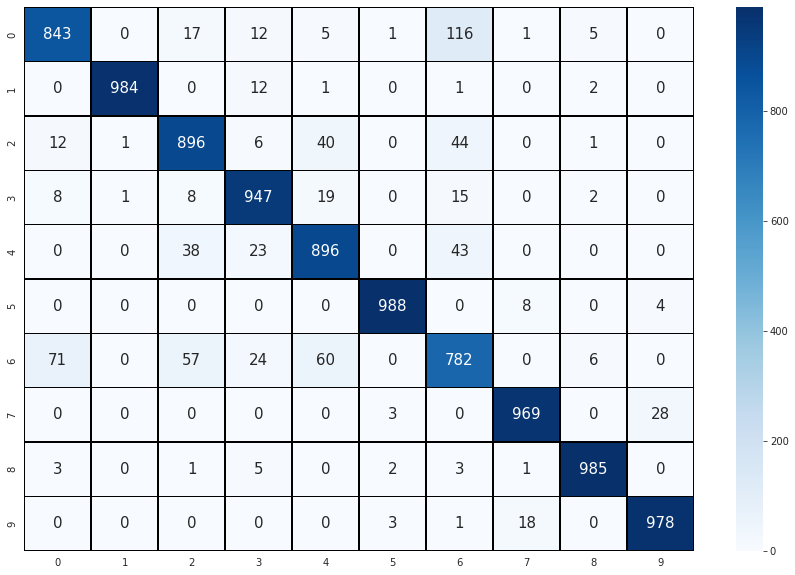

In [128]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

Model-3

In [64]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=42, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 28)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 42)        10626     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 42)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2058)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights = True)

In [66]:
model.fit(X_train, Y_train, batch_size=128, epochs=100, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.5421 - accuracy: 0.7997 - val_loss: 0.3952 - val_accuracy: 0.8547
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.3245 - accuracy: 0.8818 - val_loss: 0.3110 - val_accuracy: 0.8878
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2691 - accuracy: 0.9010 - val_loss: 0.2853 - val_accuracy: 0.8944
Epoch 4/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2350 - accuracy: 0.9130 - val_loss: 0.2800 - val_accuracy: 0.8979
Epoch 5/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2109 - accuracy: 0.9215 - val_loss: 0.2587 - val_accuracy: 0.9008
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1902 - accuracy: 0.9292 - val_loss: 0.2388 - val_accuracy: 0.9129
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1722 - accuracy: 0.9356 - val_loss: 0.2308 - val_accuracy: 0.9176

**TASK 7: Plot values of metrics you used in your model.**

In [67]:
summary = pd.DataFrame(model.history.history)
summary.tail()

,loss,accuracy,val_loss,val_accuracy
12,0.090,0.966,0.282,0.915
13,0.082,0.969,0.309,0.915
14,0.073,0.973,0.350,0.919
15,0.066,0.976,0.360,0.910
16,0.058,0.979,0.364,0.916


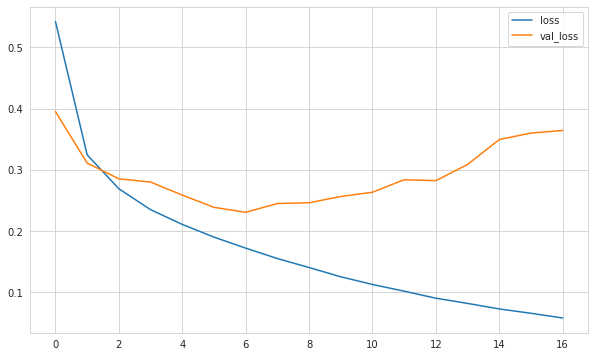

In [68]:
summary[["loss", "val_loss"]].plot();

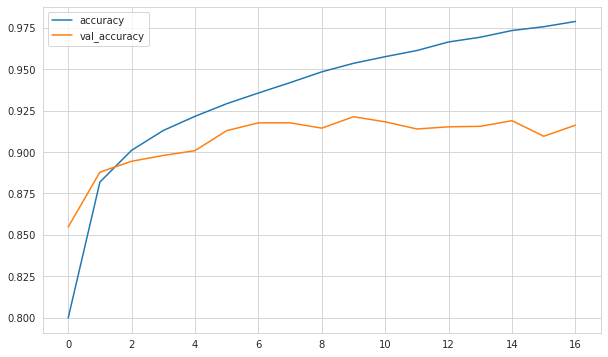

In [69]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [71]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.230758935213089
Test accuracy: 0.9175999760627747


In [72]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[1.2788859e-06, 3.4720284e-08, 6.5573099e-06, ..., 2.9645799e-04,
        1.0948967e-07, 9.9943334e-01],
       [2.5511163e-06, 4.4097175e-13, 9.9996865e-01, ..., 3.5912346e-13,
        3.3696750e-11, 7.4278809e-15],
       [6.3598745e-06, 9.9998939e-01, 5.4670682e-08, ..., 7.7779612e-13,
        4.3055617e-09, 8.1925421e-12],
       ...,
       [5.2229993e-06, 4.4894910e-09, 1.1963064e-06, ..., 2.7406170e-06,
        9.9990714e-01, 4.9918185e-07],
       [7.0937035e-06, 9.9995446e-01, 5.5720125e-06, ..., 3.2277528e-10,
        9.3230823e-10, 1.4771312e-09],
       [3.7143775e-03, 1.2392504e-04, 2.5358105e-02, ..., 7.0097834e-01,
        1.7089630e-02, 7.0730434e-03]], dtype=float32)

In [73]:
y_pred = np.argmax(pred_prob, axis=1)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.86      0.87      0.86      1000
           3       0.88      0.95      0.92      1000
           4       0.87      0.87      0.87      1000
           5       0.99      0.98      0.99      1000
           6       0.77      0.74      0.76      1000
           7       0.97      0.97      0.97      1000
           8       0.99      0.98      0.99      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [75]:
print(confusion_matrix(y_test, y_pred))

[[860   0  17  25   3   0  91   0   4   0]
 [  0 984   0  10   4   0   2   0   0   0]
 [ 17   0 867  10  51   0  54   0   1   0]
 [  8   1   7 950  10   0  24   0   0   0]
 [  0   1  53  37 867   0  42   0   0   0]
 [  0   0   0   0   0 984   0   9   0   7]
 [ 95   1  61  36  65   0 739   0   3   0]
 [  0   0   0   0   0   6   0 974   0  20]
 [  2   0   2   8   1   1   3   1 982   0]
 [  0   0   0   0   0   5   1  25   0 969]]


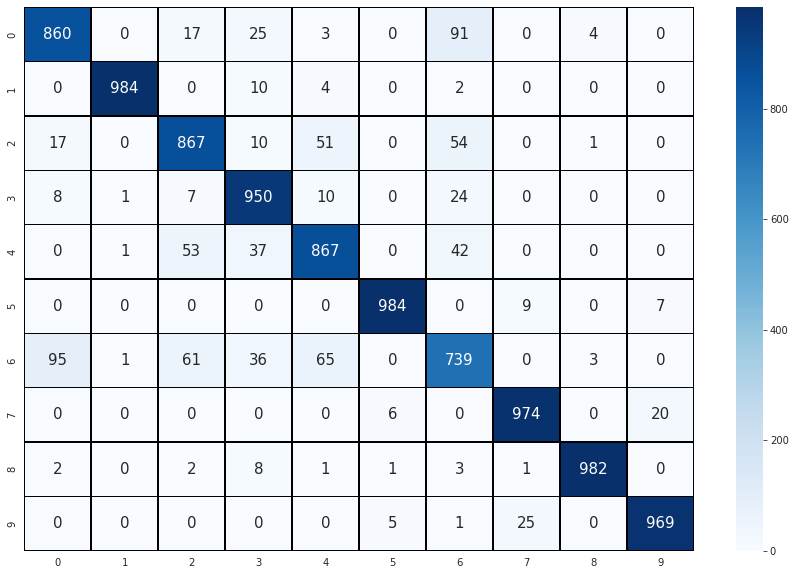

In [76]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

***# Model4-add dropout***

In [80]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=42, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 28)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 28)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 42)        10626     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 42)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 42)         

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights = True)

In [83]:
model.fit(X_train, Y_train, batch_size=128, epochs=100, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2297 - accuracy: 0.9154 - val_loss: 0.2279 - val_accuracy: 0.9169
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2248 - accuracy: 0.9164 - val_loss: 0.2300 - val_accuracy: 0.9148
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2172 - accuracy: 0.9204 - val_loss: 0.2359 - val_accuracy: 0.9127
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2154 - accuracy: 0.9197 - val_loss: 0.2469 - val_accuracy: 0.9067
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2124 - accuracy: 0.9217 - val_loss: 0.2344 - val_accuracy: 0.9107
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2050 - accuracy: 0.9231 - val_loss: 0.2349 - val_accuracy: 0.9140
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2063 - accuracy: 0.9242 - val_loss: 0.2200 - val_accuracy: 0.9181

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2465 - accuracy: 0.9113


[0.24653656780719757, 0.911300003528595]

In [84]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21366453170776367
Test accuracy: 0.9222000241279602


In [85]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [86]:
y_pred = np.argmax(pred_prob, axis=1)

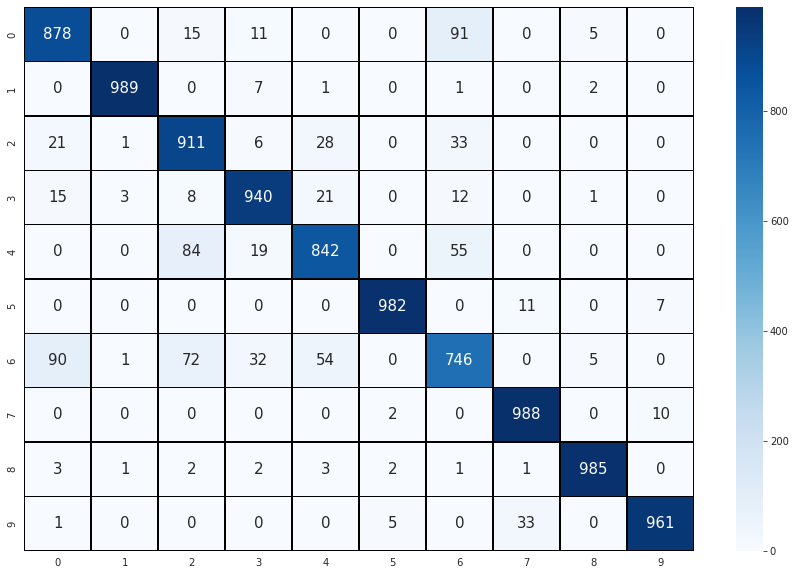

In [87]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

# Prediction

In [92]:
my_image = X_test[20]

In [93]:
my_image.shape

(28, 28, 1)

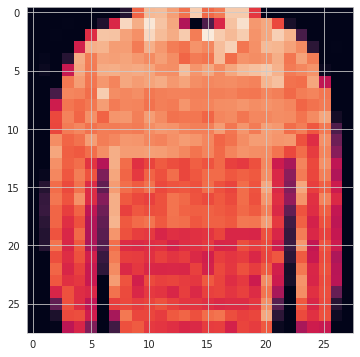

In [96]:
plt.imshow(my_image.reshape(28,28));

In [97]:
pred_prob = model.predict(my_image.reshape(1,28,28,1))
pred_prob

1/1 [==============================] - 0s 58ms/step


array([[2.1966351e-03, 1.5293409e-07, 9.9170470e-01, 2.4978285e-06,
        5.8641093e-04, 1.5400273e-08, 5.5090133e-03, 1.2858780e-07,
        4.6432893e-07, 4.2773989e-09]], dtype=float32)

In [98]:
y_pred = np.argmax(pred_prob)
y_pred

2

In [100]:
classes[2]

'Pullover'

# End of Assignment

In [101]:
model.save("cnn-assg2.h5")

In [103]:
model=tf.keras.models.load_model('cnn-assg2.h5')

In [107]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [113]:
pred=model.predict(np.expand_dims(X_test[500],axis=0))

1/1 [==============================] - 0s 16ms/step


In [114]:
classes[np.argmax(pred)]

'Pullover'

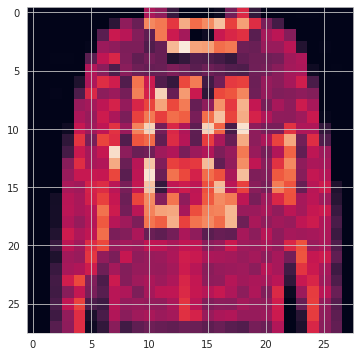

In [115]:
plt.imshow(X_test[500].reshape(28,28))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___